In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import gcsfs
import zarr

In [2]:
mask_CM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/CM4_mask_antarctica.nc')
mask_ESM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/ESM4_mask_antarctica.nc')

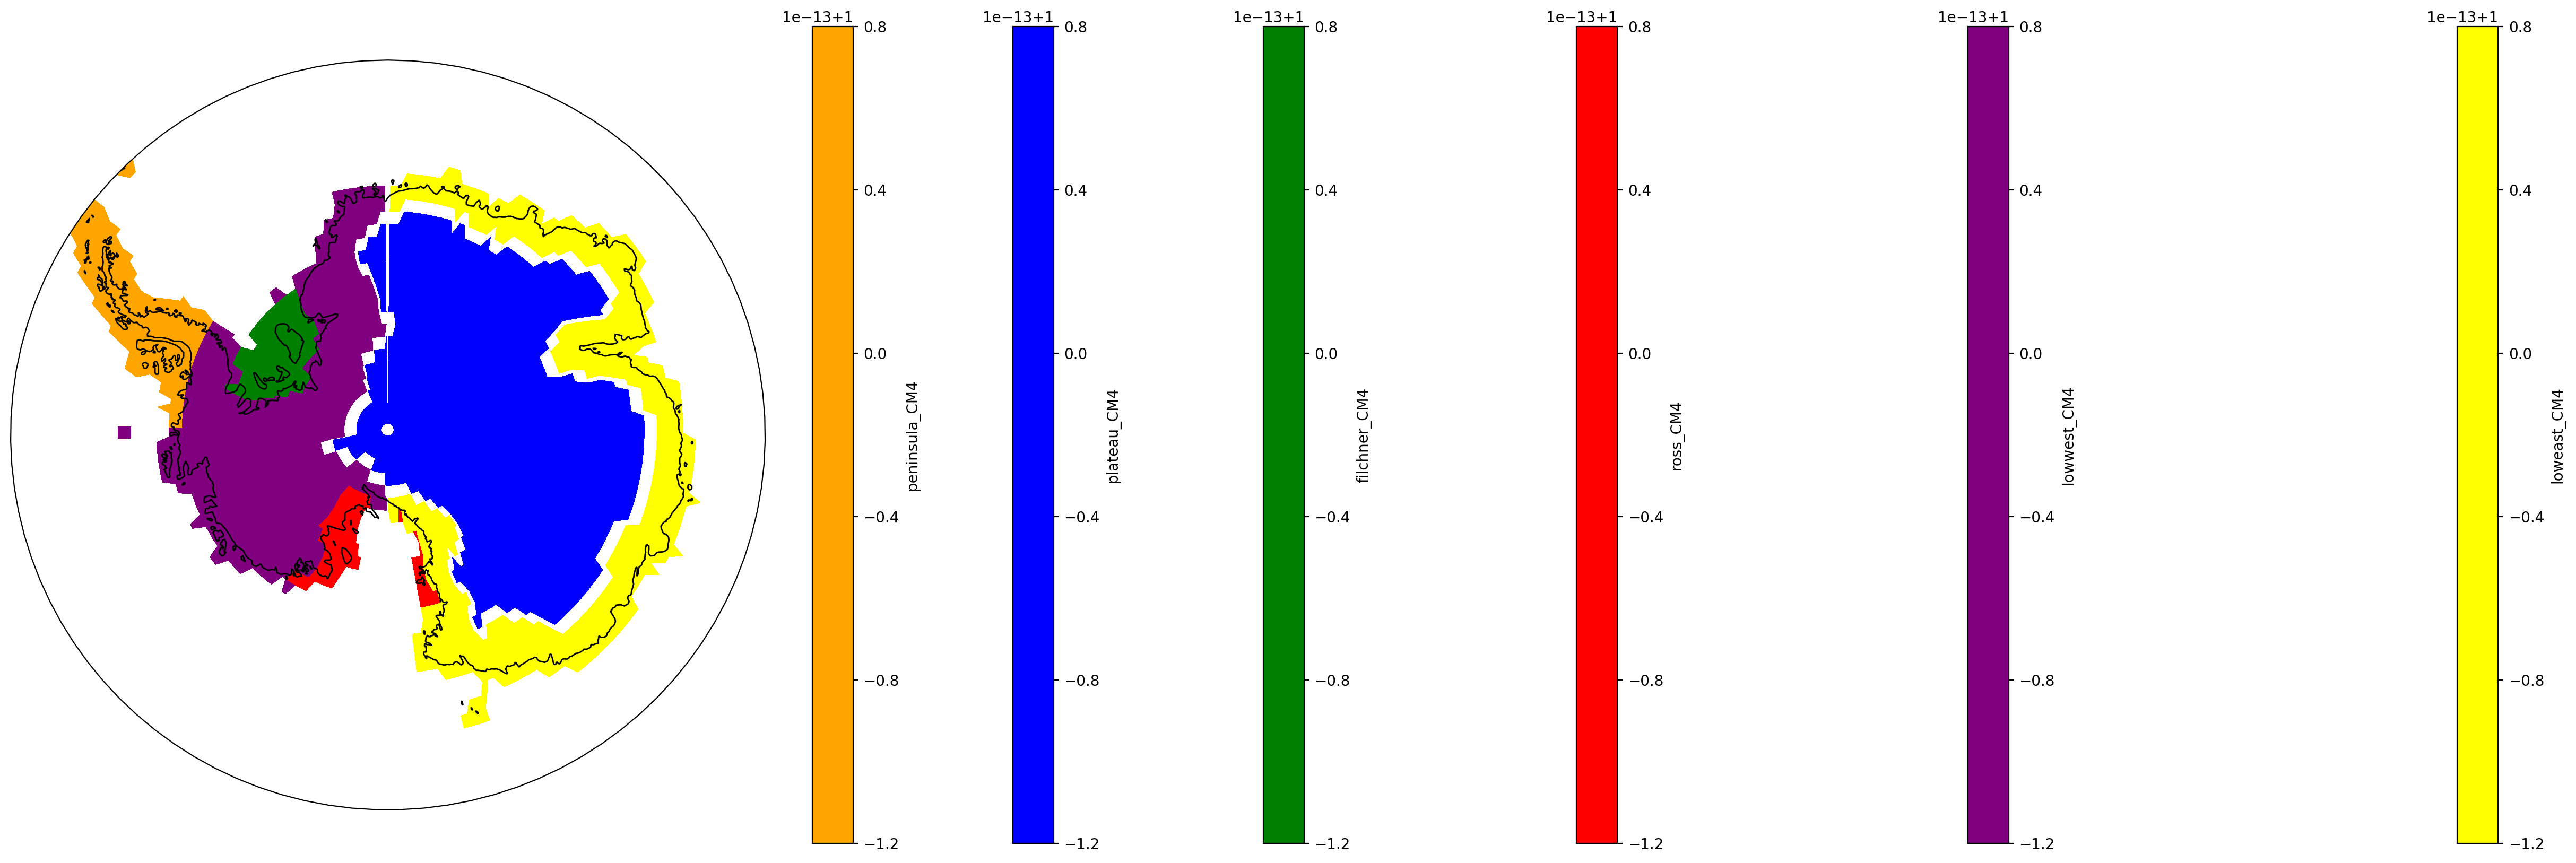

In [3]:
#Some of the masks overlap, so I had to plot them in this specific order to show them all
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[35, 10],subplot_kw=subplot_kws)
    
mask_CM4.loweast_CM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Yellow')
mask_CM4.lowwest_CM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               colors= 'Purple')
mask_CM4.ross_CM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Red')
mask_CM4.filchner_CM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Green')
mask_CM4.plateau_CM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Blue')
mask_CM4.peninsula_CM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Orange')


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()


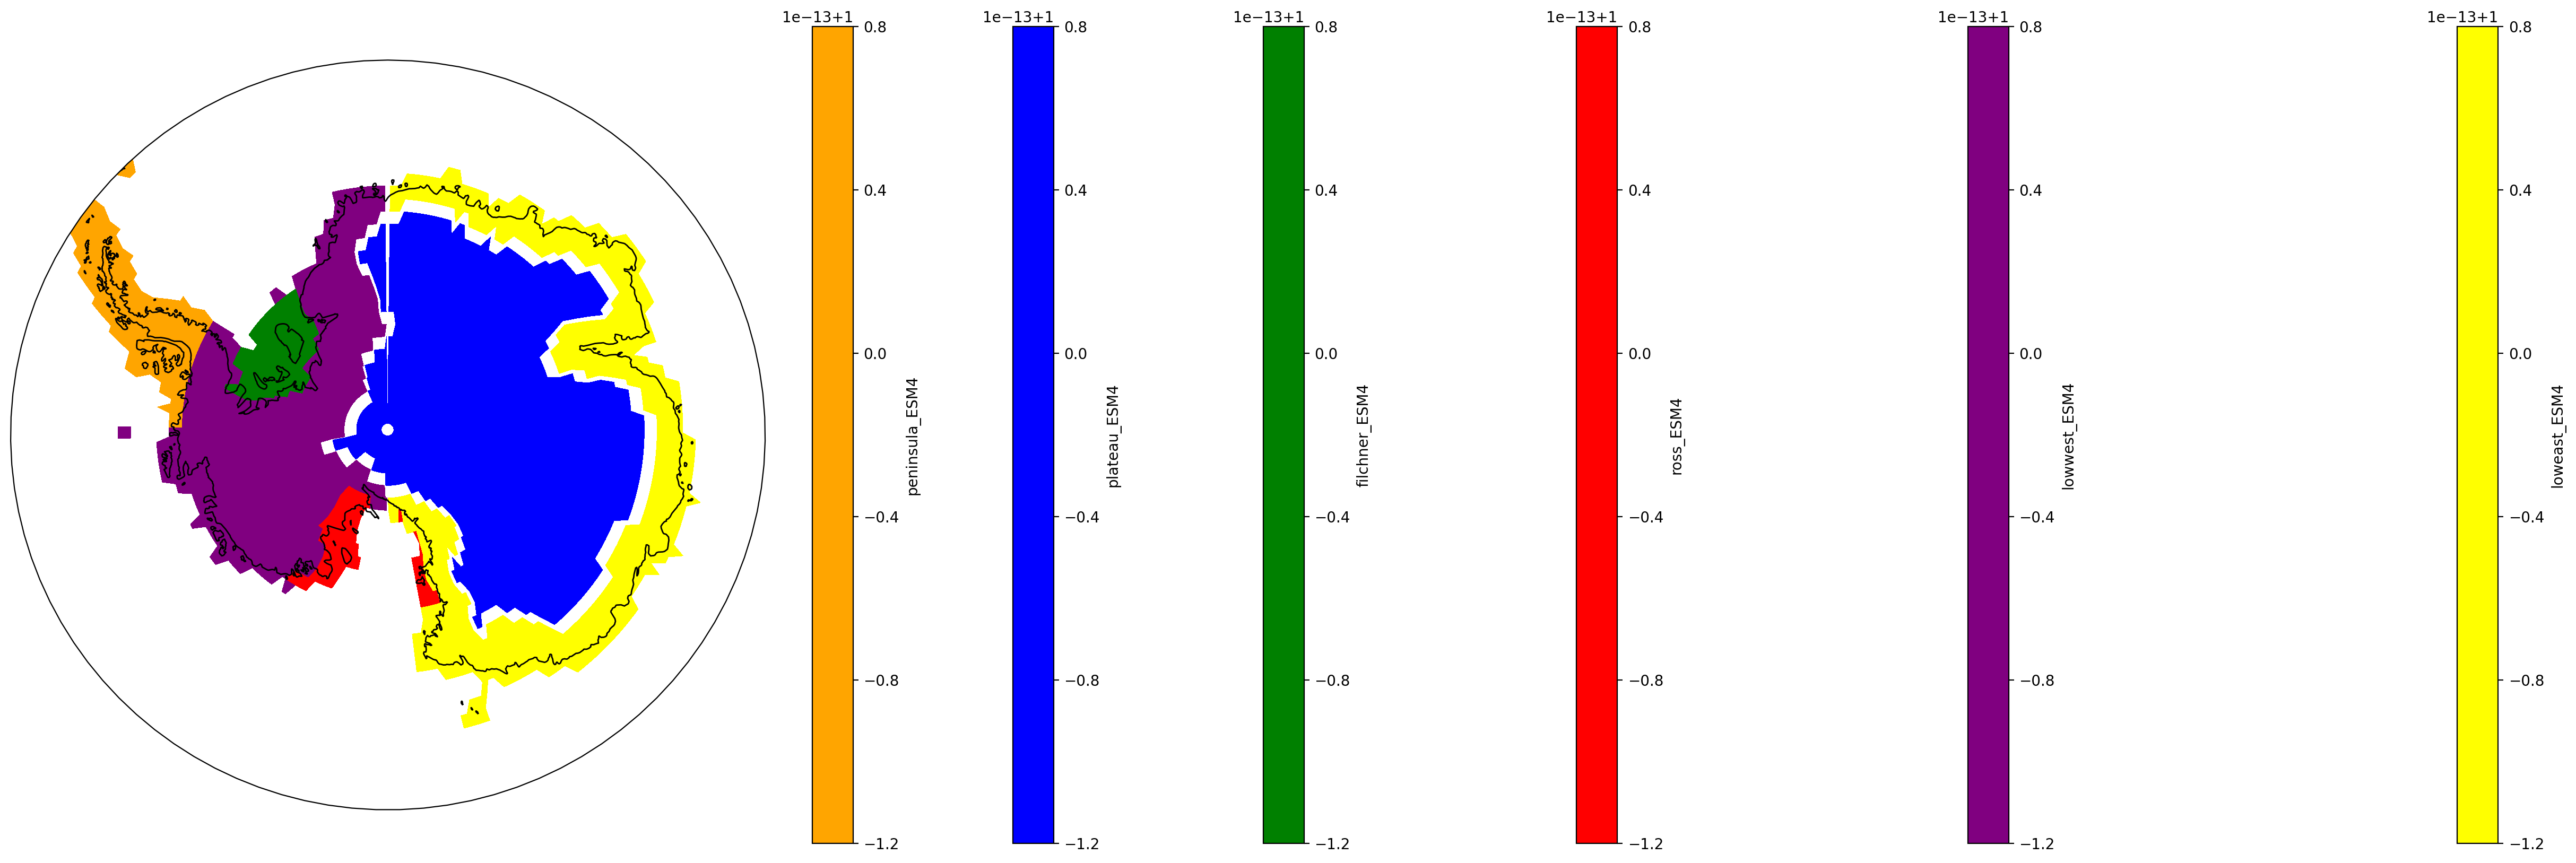

In [4]:
#Some of the masks overlap, so I had to plot them in this specific order to show them all
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[35, 10],subplot_kw=subplot_kws)
    

mask_ESM4.loweast_ESM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Yellow')
mask_ESM4.lowwest_ESM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               colors= 'Purple')
mask_ESM4.ross_ESM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Red')
mask_ESM4.filchner_ESM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Green')
mask_ESM4.plateau_ESM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Blue')
mask_ESM4.peninsula_ESM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
                colors= 'Orange')

    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()


In [46]:
colors = {
    'Ross': "Green", # value=0
    'Filchner': "Grey",    # value=1
    'Low East': "Blue",   # value=2
    'Low West': "Purple", # value=3
    'Peninsula': "Red",    # value=4
    'Plateau': "Orange",    # value=5
}

yy, xx = np.mgrid[35:45:1, -120:-110:1]
zz = np.random.randint(0, len(colors), xx.shape)

cmap = mpl.colors.LinearSegmentedColormap.from_list("lcc", list(colors.values()))

bounds = np.arange(len(colors)+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


im = ax.pcolormesh(xx, yy, zz, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

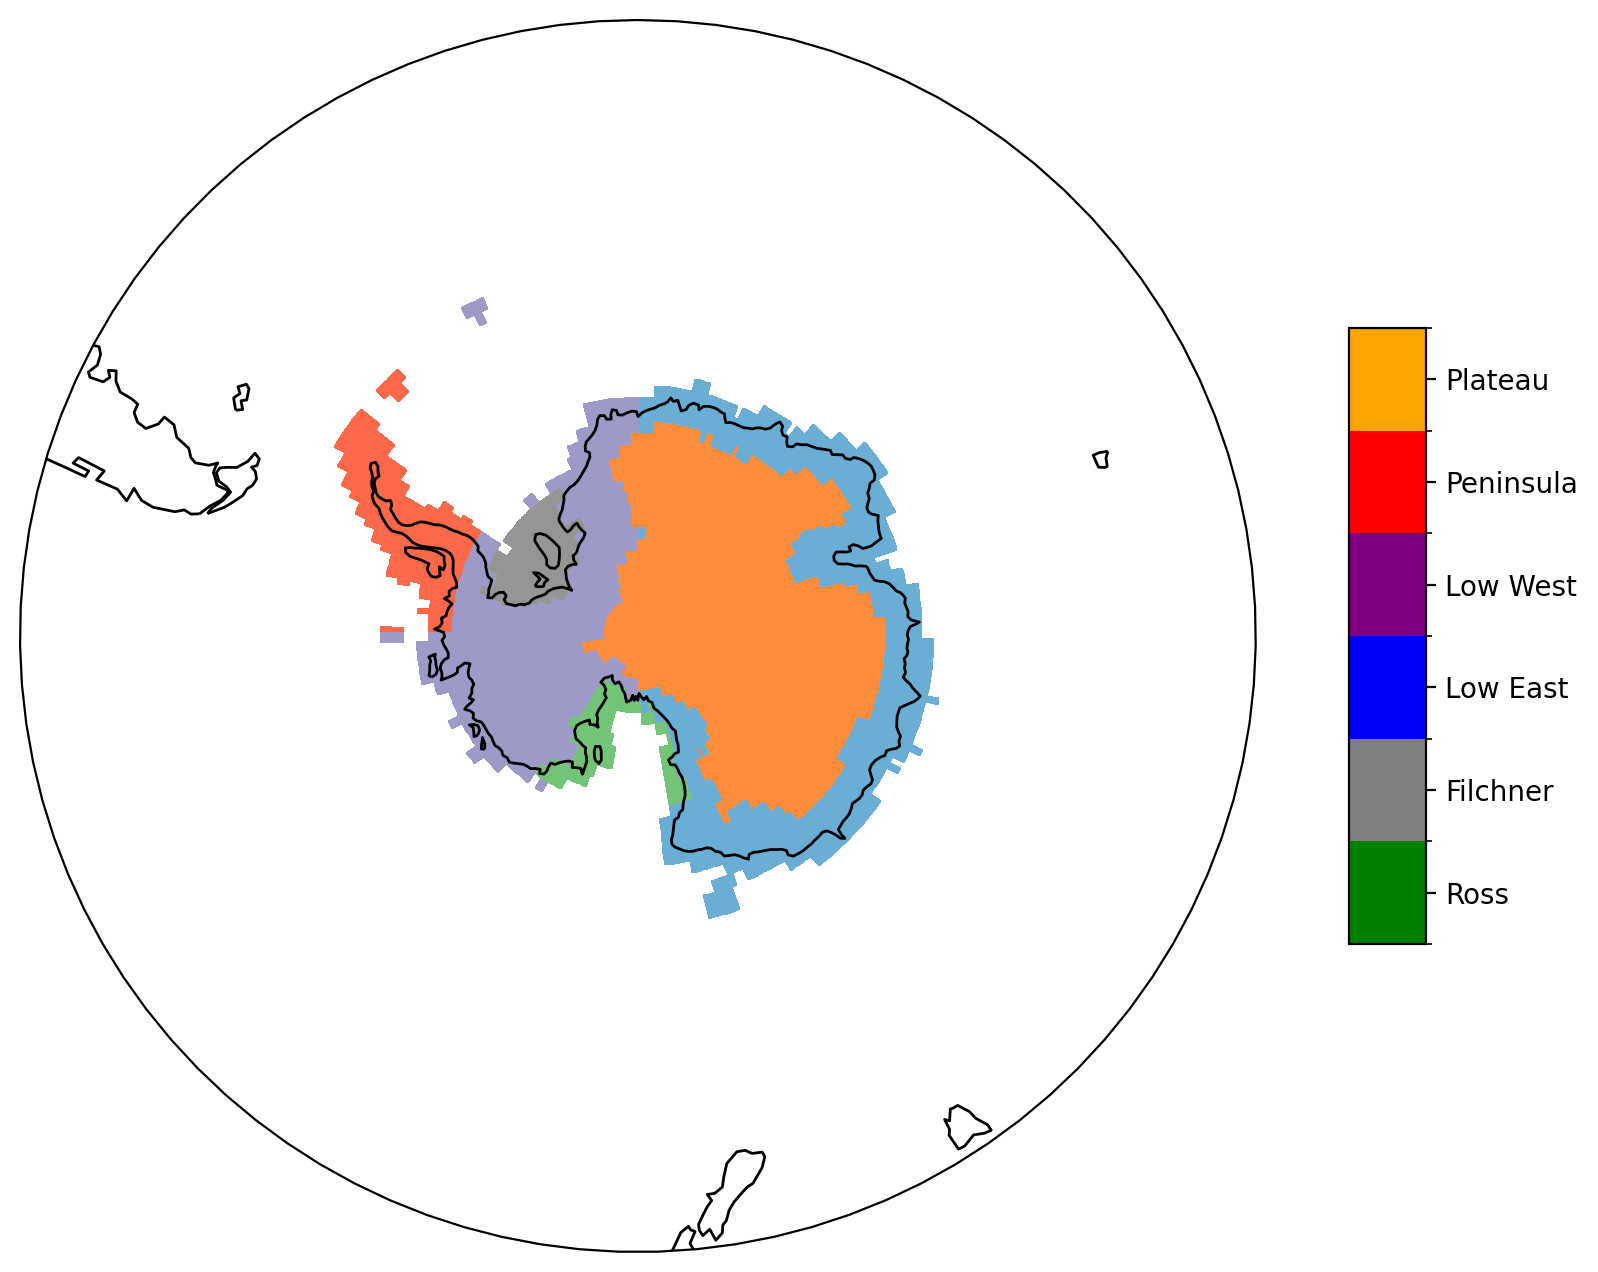

In [51]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
mask_ESM4.plateau_ESM4.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Oranges", add_colorbar=False)

mask_ESM4.lowwest_ESM4.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Purples", add_colorbar=False)


mask_ESM4.loweast_ESM4.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Blues", add_colorbar=False)

mask_ESM4.filchner_ESM4.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Greys", add_colorbar=False)

mask_ESM4.peninsula_ESM4.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Reds", add_colorbar=False)

mask_ESM4.ross_ESM4.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Greens", add_colorbar=False)


    
ax.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

cb = fig.colorbar(im, ax=ax, shrink=.5, aspect=8)
cb.set_ticks(bounds[:-1]+0.5)
cb.set_ticklabels(colors.keys())

**Fig 1.** Map of Antarctica sectioned into the Plateau, Peninsula, Low West, Low East, Filchner, and Ross regions. Masks were created by slicing latitude and longitude and selecting an elevation using ESM4 data.